In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/HEART_DISEASE_DATASET.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1323,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
1324,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
1325,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
1326,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
1327,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(1328, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1328 non-null   int64  
 4   chol      1328 non-null   int64  
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1328 non-null   int64  
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 145.4 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,54.418675,0.692771,0.948042,131.614458,246.060241,0.149096,0.529367,149.235693,0.334337,1.064232,1.388554,0.748494,2.321536,0.520331
std,9.071150,0.461519,1.029854,17.514997,51.627522,0.356318,0.527220,22.975286,0.471936,1.171519,0.617203,1.028603,0.618543,0.499775
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,691
0,637


In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1323   57    0   0       140   241    0        1      123      1      0.2   
1324   45    1   3       110   264    0        1      132      0      1.2   
1325   68    1   0       144   193    1        1      141      0      3.4   
1326   57    1   0       130   131    0        1      115      1      1.2   
1327   57    0   1       130   236    0        0      174      0      0.0   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [12]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1323    0
1324    0
1325    0
1326    0
1327    0
Name: target, Length: 1328, dtype: int64


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(1328, 13) (929, 13) (399, 13)


In [17]:
# Load the dataset
data = pd.read_csv('/content/HEART_DISEASE_DATASET.csv')

# Assuming the dataset has features and a target column named 'target'
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

# Split the data into training and testing sets (e.g., 70% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest Accuracy: 0.9799498746867168
Precision (Random Forest): 0.9798994974874372
Sensitivity (Recall): 0.9798994974874372
Recall (Random Forest): 0.9798994974874372
F1 Score (Random Forest): 0.9798994974874372


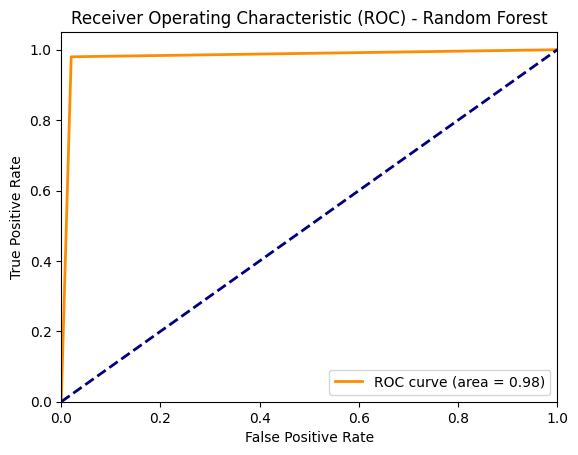

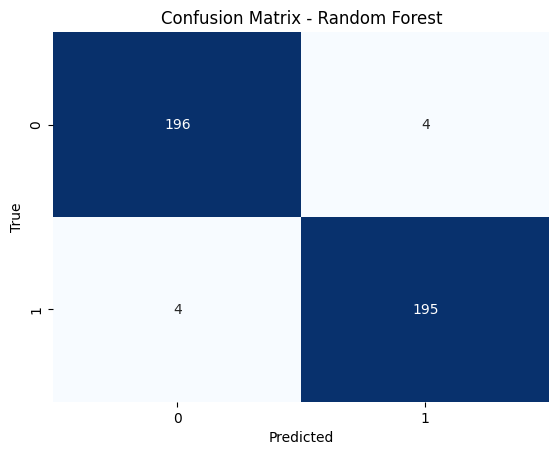

AUC (Random Forest): 0.9799497487437185
Accuracy: 0.9799
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       0.98      0.98      0.98       199

    accuracy                           0.98       399
   macro avg       0.98      0.98      0.98       399
weighted avg       0.98      0.98      0.98       399

Confusion Matrix:
 [[196   4]
 [  4 195]]


In [18]:
#Random Forest Classifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance (optional)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


# Calculate precision for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)

# Print the precision score for Random Forest
print("Precision (Random Forest):", precision_rf)
from sklearn.metrics import recall_score



# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_rf)

# Print the sensitivity score
print("Sensitivity (Recall):", sensitivity)
from sklearn.metrics import recall_score
recall_rf = recall_score(y_test, y_pred_rf)
print("Recall (Random Forest):", recall_rf)
from sklearn.metrics import f1_score

f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score (Random Forest):", f1_rf)

from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Display confusion matrix
plt.figure()
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

from sklearn.metrics import roc_auc_score
auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC (Random Forest):", auc_rf)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Make predictions on the test data.
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance using accuracy.
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# Generate a classification report for more detailed metrics.
report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report)

# Display the confusion matrix.
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)


In [19]:
# TESTING THE MODEL
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
